# Kaggle competition

# Santander Consumer Satisfaction

Team: *Enrique Herreros*

Date: *March 2016*

Description: *From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.*

*Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.*

*In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.*

Notes: *This is my 1st submission in a Kaggle competition, ever. I will stay close to Linear Regression models, as this is what I'm learning as part of the Machine Learning Specializacion (U. of Washington, Coursera)*

#### Fire necessary modules

In [1]:
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
import zipfile
import os
from math import log
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### Extract data in a folder and load csv files

In [2]:
with zipfile.ZipFile('./datasets/sample_submission.csv.zip', "r") as z:
    z.extractall(os.getcwd() + "./datasets")
with zipfile.ZipFile('./datasets/test.csv.zip', "r") as z:
    z.extractall(os.getcwd() + "./datasets")
with zipfile.ZipFile('./datasets/train.csv.zip', "r") as z:
    z.extractall(os.getcwd() + "./datasets")
    
sample_submission = pd.read_csv('./datasets/sample_submission.csv')
train_data = pd.read_csv('./datasets/train.csv')
test_data = pd.read_csv('./datasets/test.csv')
#test_data = pd.read_csv('test.csv', dtype = dtype_dict)

#### Train data and test data matrix sizes

In [3]:
print(train_data.shape)
print(test_data.shape)

(76020, 371)
(75818, 370)


In [4]:
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,117235.809430,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,182664.598503,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5163.750000,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67870.612500,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106409.160000,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118756.252500,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,22034738.760000,1.000000


#### Column names

In [5]:
train_data.loc[train_data['var3']<0, 'var3'] = 0
test_data.loc[test_data['var3']<0, 'var3'] = 0
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,75964.050723,2.713431,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,117235.809430,0.039569
std,43781.947379,9.448525,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,182664.598503,0.194945
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5163.750000,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67870.612500,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106409.160000,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118756.252500,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,22034738.760000,1.000000


In [6]:
list(train_data.columns.values)

['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 '

#### Histogram of var15

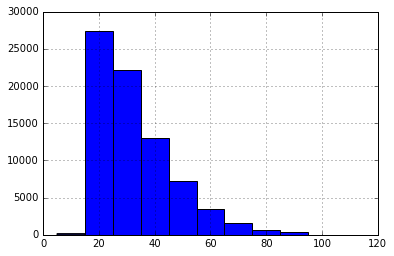

In [7]:
var15_hist = train_data['var15'].hist()
plt.show()
# Seems like age data

In [78]:
# var15 clearly looks as the age column, lets rename this field
test_data = test_data.rename(columns={'var15':'age'})
train_data = train_data.rename(columns={'var15':'age'})

# find columns with unique values on all its fields
nuniques_train = train_data.drop(['ID','TARGET'], axis=1).apply(lambda x:x.nunique())
nuniques_test = test_data.drop(['ID'], axis=1).apply(lambda x:x.nunique())
nuniques = nuniques_train[nuniques_train<8].index.unique()
X_train = train_data.drop(np.append(nuniques, ['ID','TARGET']), axis=1).values
X_train = train_data[['num_op_var39_ult3',
 'var3',
 'ind_var24',
 'num_var13_corto',
 'num_var13_0',
 'num_var13_largo',
 'num_var12_0',
 'num_var13_corto_0',
 'ind_var40',
 'num_var8',
 'num_var13_largo_0',
 'ind_var39_0',
 'num_var12',
 'ind_var37',
 'ind_var25',
 'ind_var13_medio',
 'ind_var40_0',
 'ind_var41',
 'ind_var26',
 'ind_var33',
 'ind_var12',
 'age',
 'ind_var33_0',
 'imp_op_var41_efect_ult3',
 'ind_var13_corto_0',
 'imp_op_var39_efect_ult3',
 'ind_var41_0',
 'ind_var24_0',
 'ind_var6_0',
 'imp_op_var41_efect_ult1',
 'num_var14_0',
 'num_var13',
 'imp_op_var41_comer_ult1',
 'imp_op_var40_ult1',
 'imp_op_var39_efect_ult1',
 'ind_var12_0',
 'imp_op_var41_comer_ult3',
 'num_var1_0',
 'ind_var13_corto',
 'imp_op_var41_ult1',
 'ind_var13',
 'ind_var6',
 'ind_var5',
 'ind_var2',
 'num_var1',
 'ind_var44_0',
 'imp_op_var39_comer_ult1',
 'imp_ent_var16_ult1',
 'num_var6',
 'ind_var8',
 'num_var5_0',
 'ind_var37_0',
 'ind_var39',
 'ind_var13_largo_0',
 'num_var6_0',
 'num_var4',
 'ind_var46',
 'imp_op_var39_ult1',
 'ind_var13_largo',
 'num_var5',
 'num_var13_medio',
 'num_var13_medio_0',
 'ind_var31_0',
 'num_var8_0',
 'num_var24_0',
 'ind_var20']]
X_test = test_data.drop(np.append(nuniques, 'ID'), axis=1).values
y_train = train_data['TARGET'].values
id_test = test_data['ID']

In [87]:
train_data[train_data['TARGET']==1].describe().T.append(train_data[train_data['TARGET']==0].describe().T).sort_index(inplace=False)

,count,mean,std,min,25%,50%,75%,max
ID,3008,76643.175864,4.467538e+04,77.00,37405.2500,77559.50,116880.500000,1.518110e+05
ID,73012,75936.071646,4.374483e+04,1.00,38129.7500,75989.50,113615.250000,1.518380e+05
TARGET,3008,1.000000,0.000000e+00,1.00,1.0000,1.00,1.000000,1.000000e+00
TARGET,73012,0.000000,0.000000e+00,0.00,0.0000,0.00,0.000000,0.000000e+00
age,3008,39.680519,1.202052e+01,23.00,30.0000,38.00,47.000000,1.020000e+02
age,73012,32.946406,1.292444e+01,5.00,23.0000,27.00,39.000000,1.050000e+02
delta_imp_amort_var18_1y3,73012,273927.573522,5.233773e+07,0.00,0.0000,0.00,0.000000,1.000000e+10
delta_imp_amort_var18_1y3,3008,0.000000,0.000000e+00,0.00,0.0000,0.00,0.000000,0.000000e+00
delta_imp_amort_var34_1y3,3008,0.000000,0.000000e+00,0.00,0.0000,0.00,0.000000,0.000000e+00
delta_imp_amort_var34_1y3,73012,273927.573522,5.233773e+07,0.00,0.0000,0.00,0.000000,1.000000e+10


#### Random Forest Classifier

In [79]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10,n_jobs = -1, random_state=1)
scores = cross_validation.cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=5) 
print(scores.mean())

0.793409713296


In [46]:
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [47]:
submission = pd.DataFrame({"ID":id_test, "TARGET":y_pred[:,1]})
submission.to_csv("submission.csv", index=False)